<a href="https://colab.research.google.com/github/SarayuBurugu/Application-of-data-mining/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
np.random.seed(42)
data=np.random.normal(0,1,100)
outliers=np.random.uniform(5,10,5)

In [ ]:
data.max()

1.8522781845089378

In [ ]:
print(data)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0.35711257  1

In [ ]:
data_series=pd.Series(data)

In [ ]:
data_series.describe()

,0
count,100.000000
mean,-0.103847
std,0.908168
min,-2.619745
25%,-0.600906
50%,-0.126956
75%,0.405952
max,1.852278


In [ ]:
data.min()

-2.6197451040897444

In [ ]:
outliers.min()

5.599326836668414

In [ ]:
outliers.max()

9.714548519562596

In [ ]:
data_with_outliers=np.concatenate([data,outliers])

In [ ]:
df=pd.DataFrame(data_with_outliers,columns=['Value'])

In [ ]:
#detect outliers using IQR method
Q1=df['Value'].quantile(0.25)
Q3=df['Value'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [ ]:
#identifying outliers
ouliers_iqr=df[(df['Value']<lower_bound) | (df['Value']>upper_bound)]

In [ ]:

z_scores = stats.zscore(df['Value'])
outliers_zscore = df[np.abs(z_scores) > 3]

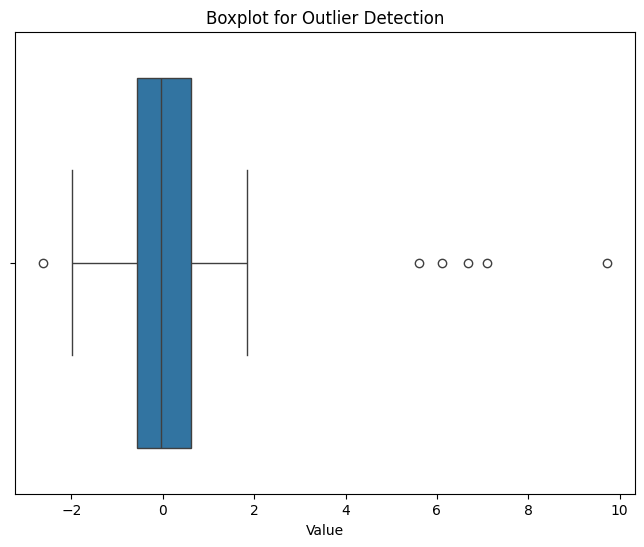

In [ ]:
plt.figure(figsize=(8, 6))           #Visualize outliers using a boxplot
sns.boxplot(x=df['Value'])
plt.title("Boxplot for Outlier Detection")
plt.show()

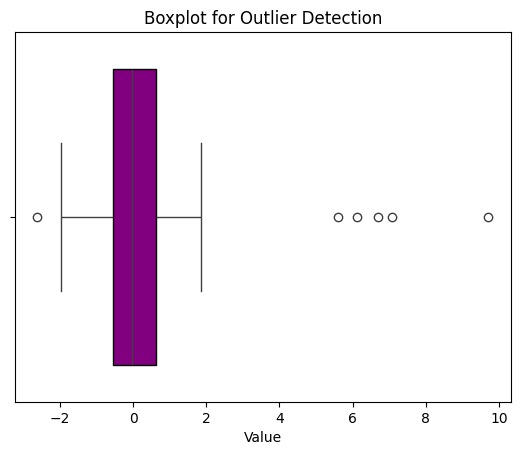

In [ ]:
sns.boxplot(x=df['Value'], boxprops=dict(facecolor='purple', edgecolor='black'))
plt.title("Boxplot for Outlier Detection")
plt.show()

In [26]:
# Capping: Set outliers to the upper and lower bounds
df_capped = df.copy()
df_capped['Value'] = np.clip(df_capped['Value'], lower_bound, upper_bound)

In [27]:
df_removed = df.copy()
df_removed = df_removed[(df_removed['Value'] >= lower_bound) &
(df_removed['Value'] <= upper_bound)]

In [28]:
df_imputed = df.copy()
median_value = df['Value'].median()
df_imputed['Value'] = np.where((df_imputed['Value'] < lower_bound) |
(df_imputed['Value'] > upper_bound), median_value, df_imputed['Value'])

In [29]:
df_imputed

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,-0.035826
101,-0.035826
102,-0.035826
103,-0.035826


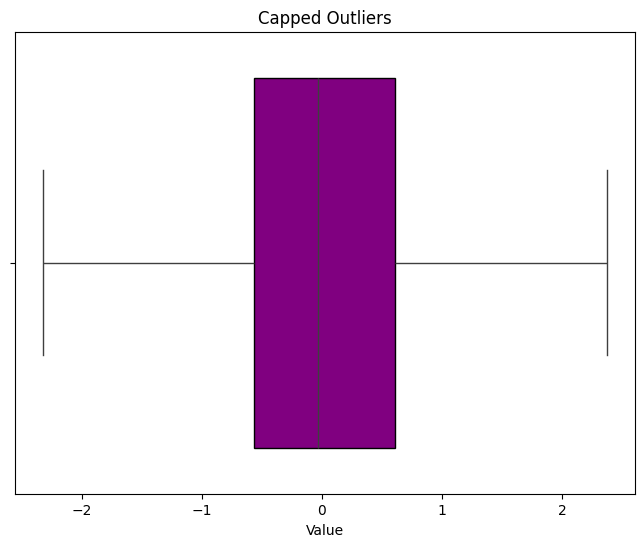

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_capped['Value'],boxprops=dict(facecolor='purple',edgecolor='black'))
plt.title("Capped Outliers")
plt.show()

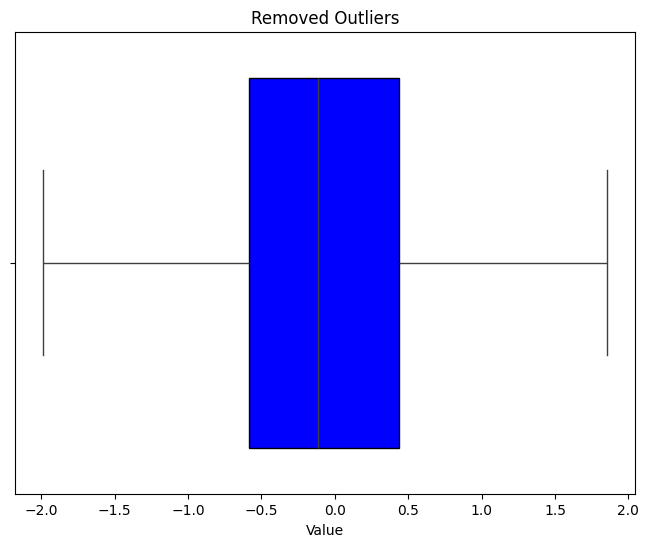

In [36]:
# Removed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_removed['Value'],boxprops=dict(facecolor='blue',edgecolor='black'))
plt.title("Removed Outliers")
plt.show()